<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Exercise_PCA_kmeans_customer_credit_card_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exercise:** `PCA & K-Means`



**Study case:** `creditcard.csv dataset`

- Perform EDA to understand the dataset being worked with.
- Perform necessary data cleaning and scaling with Standardscaler.
- Perform PCA, then analyze the relationship between the number of components and the percentage of information extracted (variance explained).
- For the purposes of this exercise, perform clustering using two principal components, then find the best number of clusters using the elbow method and silhouette score.
- Interpret the clustering results.

### **Initial Setup**

In [1]:
# Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler

# Machine learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import silhouette_score

# Setting display
import warnings
warnings.filterwarnings('ignore')

# Style
plt.style.use('ggplot')

### **Data Understanding**

- The dataset depicts 8,950 customer data.
- Each row represents information/characteristics of an individual, such as balance, purchase amount, frequency, and other transaction information.

In [2]:
# Loading dataset
url = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/creditcard.csv'
data = pd.read_csv(url)
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Attribute Information**

| Attribute | Description |
|---|---|
| CUSTID | Identification of Credit Card holder (Categorical) |
| BALANCE | Balance amount left in their account to make purchases |
| BALANCEFREQUENCY | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
| PURCHASES | Amount of purchases made from account |
| ONEOFFPURCHASES | Maximum purchase amount done in one-go |
| INSTALLMENTSPURCHASES | Amount of purchase done in installment |
| CASHADVANCE | Cash in advance given by the user |
| PURCHASESFREQUENCY | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFFPURCHASESFREQUENCY | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) |
| PURCHASESINSTALLMENTSFREQUENCY | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) |
| CASHADVANCEFREQUENCY | How frequently the cash in advance being paid |
| CASHADVANCETRX | Number of Transactions made with "Cash in Advanced" |
| PURCHASESTRX | Numbe of purchase transactions made |
| CREDITLIMIT | Limit of Credit Card for user |
| PAYMENTS | Amount of Payment done by user |
| MINIMUM_PAYMENTS | Minimum amount of payments made by user |
| PRCFULLPAYMENT | Percent of full payment paid by user |
| TENURE | Tenure of credit card service for user |

**Initial Assesment**

In [3]:
# Check data type, null values, and unique values ​​of each column
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,CUST_ID,object,0.000000,False,8950,"[C10001, C10002, C10003, C10004, C10005, C1000..."
1,BALANCE,float64,0.000000,False,8871,"[40.900749, 3202.467416, 2495.148862, 1666.670..."
2,BALANCE_FREQUENCY,float64,0.000000,False,43,"[0.818182, 0.909091, 1.0, 0.636364, 0.545455, ..."
3,PURCHASES,float64,0.000000,False,6203,"[95.4, 0.0, 773.17, 1499.0, 16.0, 1333.28, 709..."
4,ONEOFF_PURCHASES,float64,0.000000,False,4014,"[0.0, 773.17, 1499.0, 16.0, 6402.63, 661.49, 1..."
5,INSTALLMENTS_PURCHASES,float64,0.000000,False,4452,"[95.4, 0.0, 1333.28, 688.38, 436.2, 200.0, 920..."
6,CASH_ADVANCE,float64,0.000000,False,4323,"[0.0, 6442.945483, 205.788017, 346.81139, 2301..."
7,PURCHASES_FREQUENCY,float64,0.000000,False,47,"[0.166667, 0.0, 1.0, 0.083333, 0.666667, 0.333..."
8,ONEOFF_PURCHASES_FREQUENCY,float64,0.000000,False,47,"[0.0, 1.0, 0.083333, 0.166667, 0.25, 0.916667,..."
9,PURCHASES_INSTALLMENTS_FREQUENCY,float64,0.000000,False,47,"[0.083333, 0.0, 0.583333, 1.0, 0.25, 0.916667,..."


**Descriptive Statistics**

In [4]:
display(data.describe(), data.describe(include='object'))

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


,CUST_ID
count,8950
unique,8950
top,C19190
freq,1


### **Exploratory Data Analysis (EDA)**

#### `Numerical Features`

**Data Distribution**

In [5]:
numerical = [var for var in data.columns if data[var].dtypes not in ['object']]

In [6]:
# Data distribution # Normal test
from scipy.stats import normaltest

dist = []

for i in range(len(numerical)):
    feature_name = numerical[i]
    stat, p_value = normaltest(data[feature_name].dropna())

    if p_value > 0.05:
        distribution = "Normally Distributed"
    else:
        distribution = "Not Normally Distributed"

    dist.append([feature_name, stat, p_value, distribution])

dist_df = pd.DataFrame(dist, columns=['Feature', "D'Agostino-Pearson Statistic", 'P-value', 'Distributed'])
dist_df

,Feature,D'Agostino-Pearson Statistic,P-value,Distributed
0,BALANCE,4552.275440,0.0,Not Normally Distributed
1,BALANCE_FREQUENCY,3331.563465,0.0,Not Normally Distributed
2,PURCHASES,12541.263885,0.0,Not Normally Distributed
3,ONEOFF_PURCHASES,14093.414501,0.0,Not Normally Distributed
4,INSTALLMENTS_PURCHASES,11800.406566,0.0,Not Normally Distributed
5,CASH_ADVANCE,9483.841709,0.0,Not Normally Distributed
6,PURCHASES_FREQUENCY,42039.097730,0.0,Not Normally Distributed
7,ONEOFF_PURCHASES_FREQUENCY,2136.878089,0.0,Not Normally Distributed
8,PURCHASES_INSTALLMENTS_FREQUENCY,86818.307899,0.0,Not Normally Distributed
9,CASH_ADVANCE_FREQUENCY,3083.513763,0.0,Not Normally Distributed


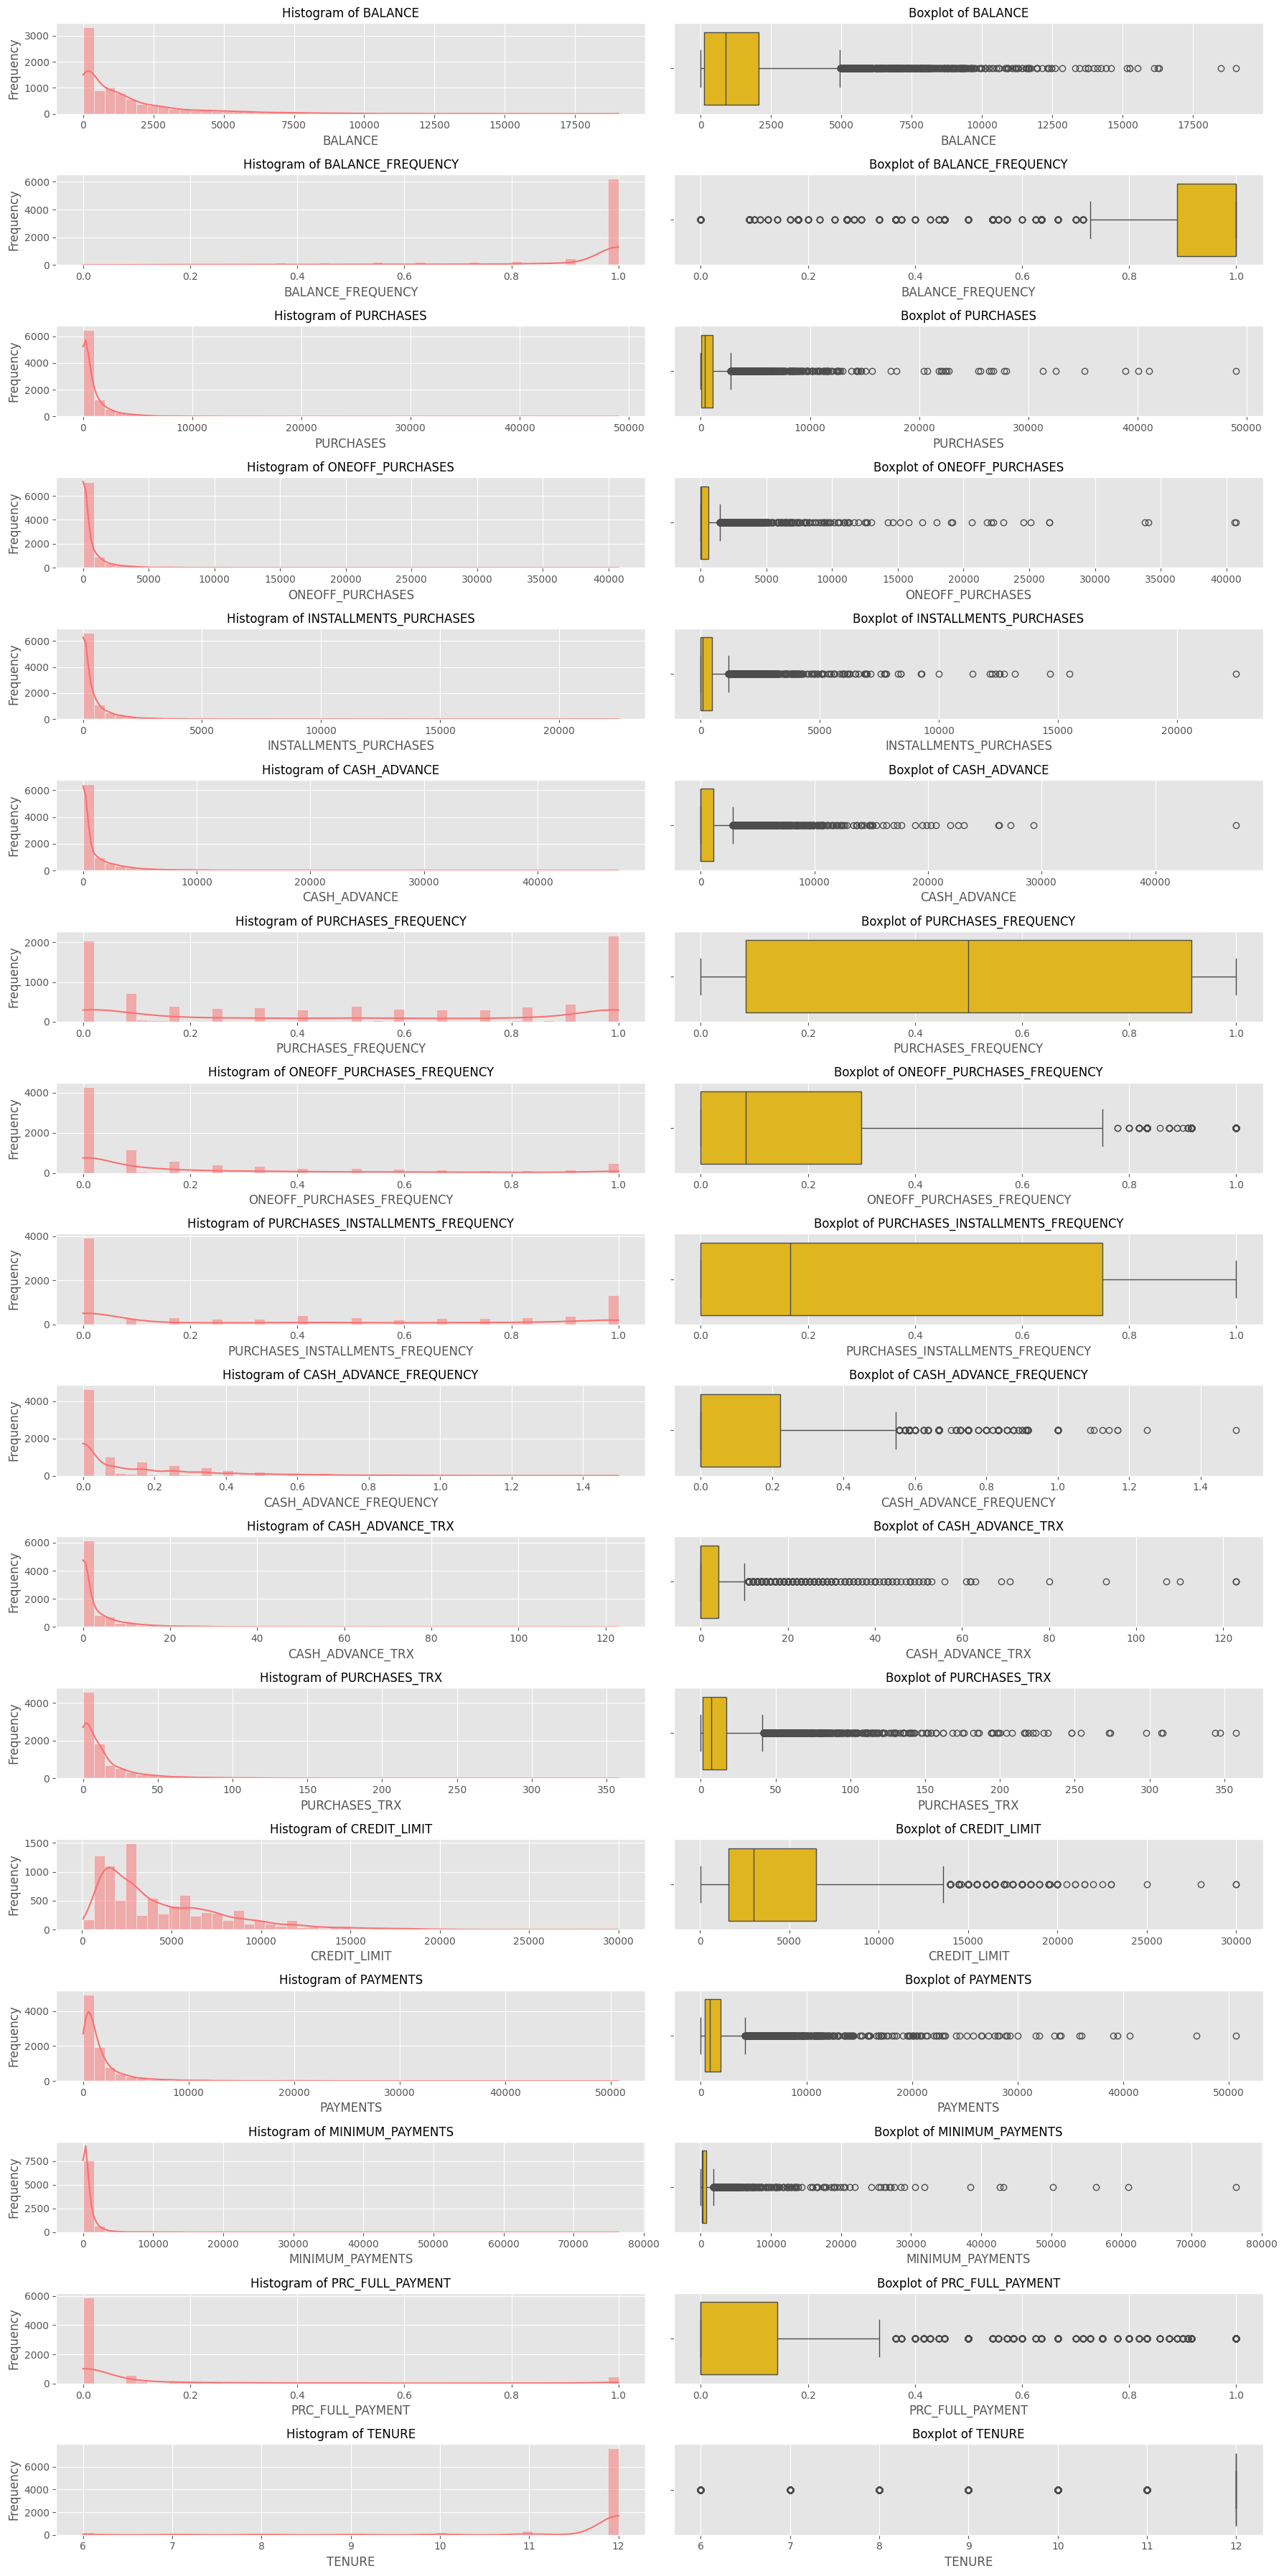

In [7]:
plt.figure(figsize=(18, 36))

for index, col in enumerate(numerical):
    # Histogram
    plt.subplot(len(numerical), 2, index * 2 + 1)
    sns.histplot(data[col], kde=True, color='#FA7070', bins=50)
    plt.title(f'Histogram of {col}', size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(len(numerical), 2, index * 2 + 2)
    sns.boxplot(x=data[col], color='#FFC700')
    plt.title(f'Boxplot of {col}', size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

**Interpretation**

- The value range of each feature varies.
- To use PCA, it's best to scale the data because PCA mathematically calculates the distance between data points.

**Correlation**

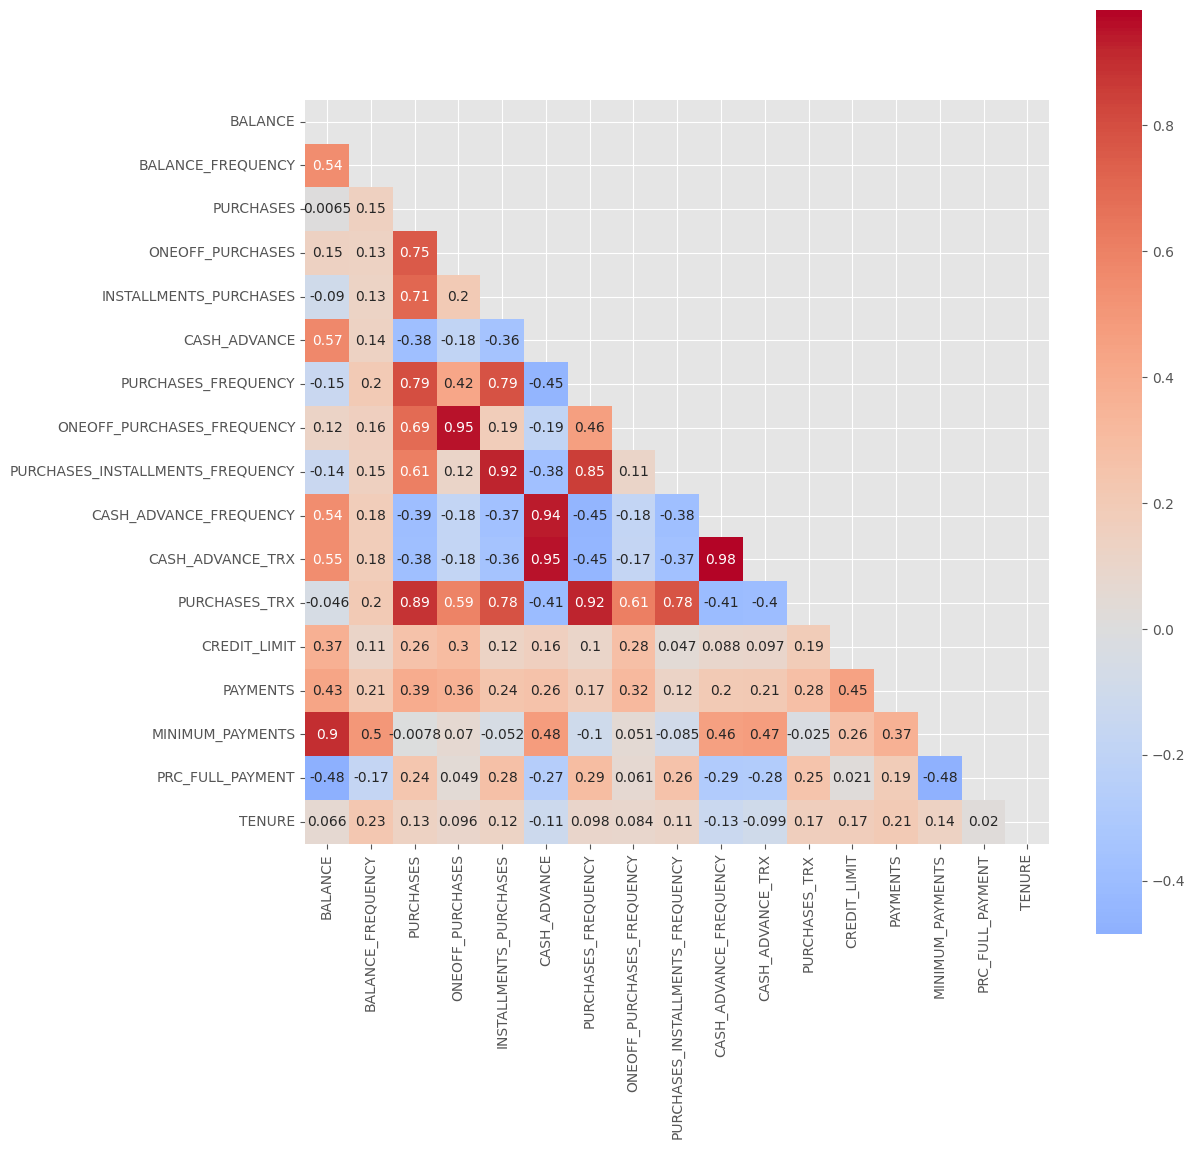

In [8]:
# Heatmap correlation
plt.figure(figsize=(12, 12))

matrix = np.triu(data.select_dtypes(['int', 'float']).corr(method='spearman'))

sns.heatmap(data=data.select_dtypes(['int', 'float']).corr(method='spearman'), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

**Interpretation**

There are several features with high correlation. We can use the dimensionality reduction (PCA) method to reduce the model input dimensionality while still containing nearly the same information (maximum variance).

### **Data Preprocessing**

#### `Remove Unused Columns`

Because the Customer ID is unique to each customer, this feature is not essential for clustering.

In [9]:
data.drop(columns=['CUST_ID'], inplace=True)

#### `Missing Values`

Since the distribution of MINIMUM_PAYMENTS does not follow a normal distribution (there is skewness), imputing missing values ​​using the median value will provide a better estimate of the value.

In [10]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())

As for the missing values ​​in the CREDIT_LIMIT column, we will just delete them because the number is small.

In [11]:
data.dropna(subset=['CREDIT_LIMIT'], inplace=True)

### **Modeling**

#### `Define Features (X)`

In [12]:
# Features
X = data

#### `Scaling data`
- Scaling is needed in PCA because it calculates distance
- Scaling is needed in KMeans clustering because it calculates distance

In [13]:
# define scaler
scaler = StandardScaler()

# fitting_transform
X_scaled = scaler.fit_transform(X)

#### `Dimensionality reduction (PCA)`

In [14]:
# define PCA
pca = PCA(random_state=0)

# fit PCA to the scaled data
pca.fit(X_scaled)

PCA(random_state=0)

In [15]:
df_variance = pd.DataFrame({
    'PC' : range(len(X.columns)),
    'Variance' : pca.explained_variance_ratio_,
    'Cumulative Var' : pca.explained_variance_ratio_.cumsum()
})

df_variance.head()

,PC,Variance,Cumulative Var
0,0,0.272951,0.272951
1,1,0.203144,0.476095
2,2,0.088123,0.564218
3,3,0.074805,0.639023
4,4,0.062254,0.701277


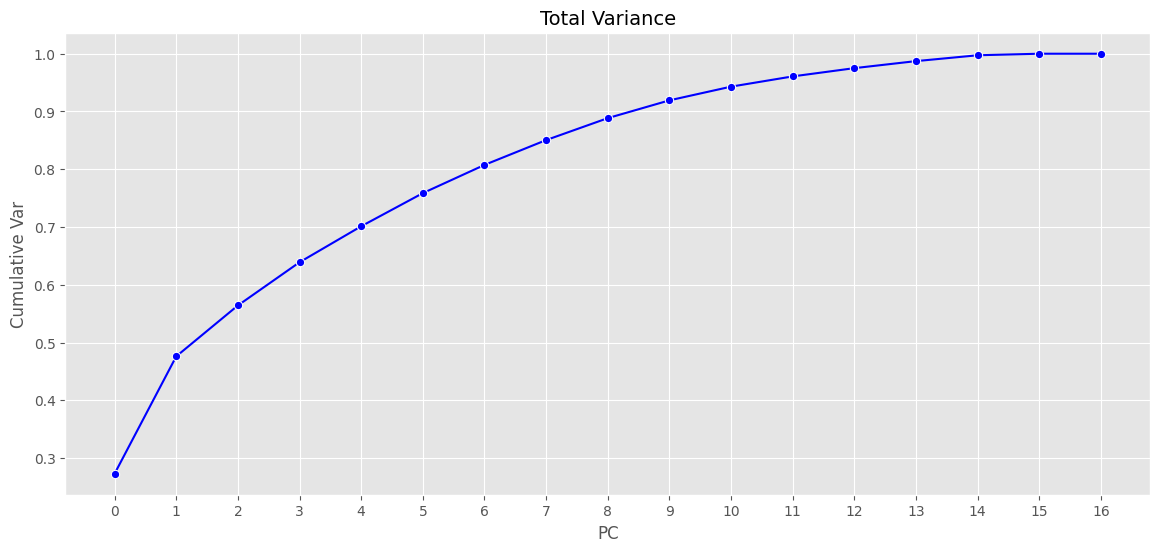

In [16]:
# cummulative sum of variance from 17 components
plt.figure(figsize=(14,6))
sns.lineplot(data=df_variance, x='PC', y='Cumulative Var', color='b', marker='o')
plt.xticks(range(len(X.columns)))
plt.title('Total Variance', size=14)
plt.show()

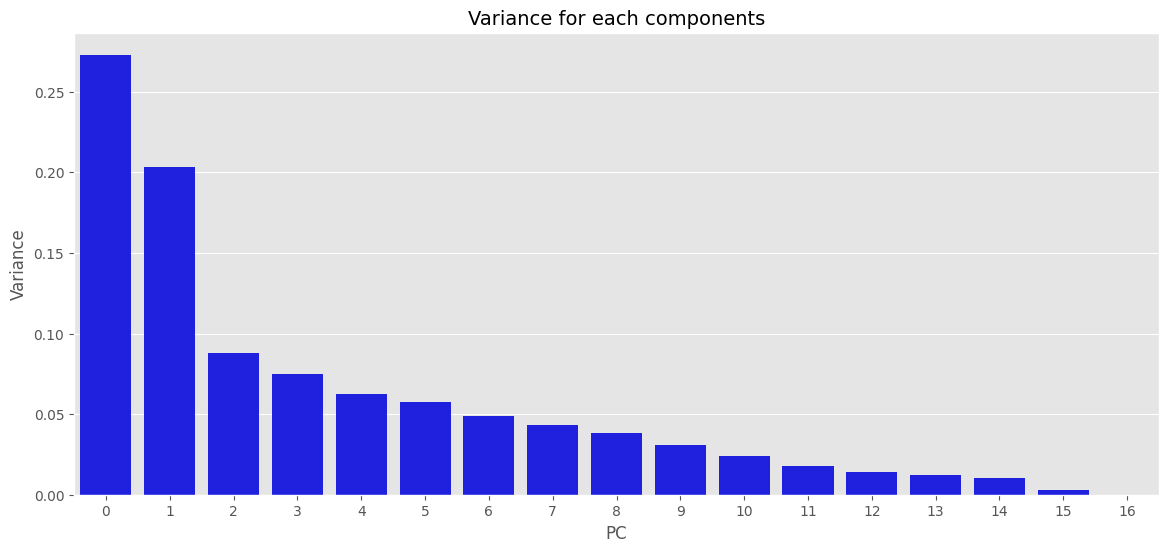

In [17]:
# Variance that can be explained by each component (17 components)
plt.figure(figsize=(14,6))
sns.barplot(data=df_variance, x='PC', y='Variance', color='b')
plt.title('Variance for each components', size=14)
plt.show()

Next we will only use 2 principal components

In [18]:
# 2 principal components
pca_2com = PCA(n_components=2, random_state=0)

# fit dan transform
X_pca_2com = pca_2com.fit_transform(X_scaled)

#### `K-Means clustering`


**Elbow Method**

In [19]:
number_of_cluster = range(2, 11)
clusterings = [KMeans(n_clusters=k, random_state=0).fit(X_pca_2com) for k in number_of_cluster]

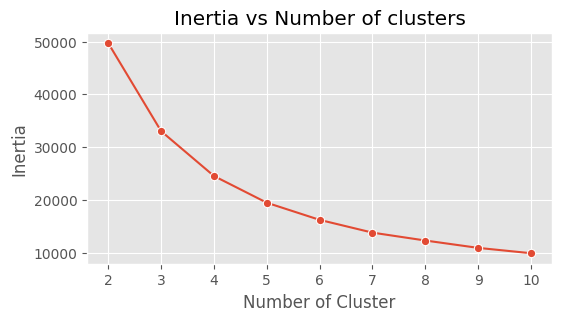

In [20]:
# Inertia vs number of cluster
inertia = [model.inertia_ for model in clusterings]

plt.figure(figsize=(6, 3))
sns.lineplot(y=inertia, x=number_of_cluster, marker='o')

plt.title('Inertia vs Number of clusters')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.show()

**Interpretation**

The Elbow Method does not yet show the location of the "elbow" for determining the best number of clusters.

**Silhouette Score**

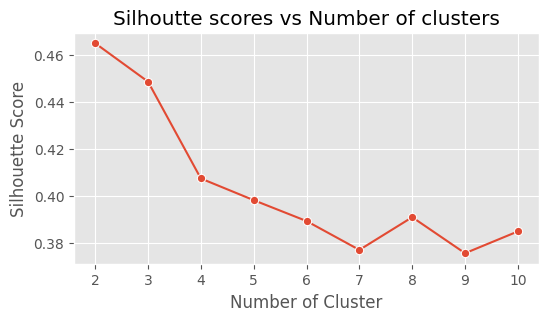

In [21]:
silhoutte_scores = [silhouette_score(X_pca_2com, model.labels_, metric='euclidean') for model in clusterings]

plt.figure(figsize=(6, 3))
sns.lineplot(y=silhoutte_scores, x=number_of_cluster, marker='o')

plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of Cluster')
plt.ylabel('Silhouette Score')
plt.show()

**Interpretation**

Based on the silhouette score, the best number of clusters for this dataset is 2 clusters.

#### `Final Model`

In [22]:
# Kmean with number of clusters 2
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')
kmeans.fit(X_pca_2com)

# labels given to each data point with the number of clusters 2 (0 and 1)
cluster = kmeans.labels_

# dataframe
df_pca = pd.DataFrame(data=X_pca_2com, columns=['PC0', 'PC1'])
df_pca['labels'] = cluster
df_pca.head()

,PC0,PC1,labels
0,-1.683768,-1.072569,1
1,-1.134846,2.508739,1
2,0.969060,-0.383487,1
3,-0.888426,0.004385,1
4,-1.600262,-0.684048,1


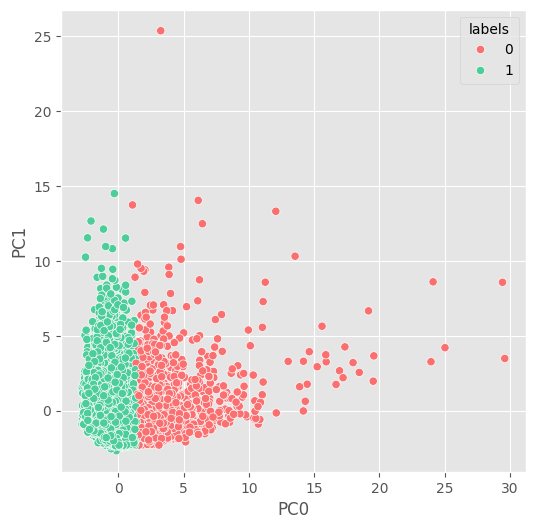

In [23]:
# Visualization of Cluster-0 (red) and Cluster-1 (green)
plt.figure(figsize=(6,6))
sns.scatterplot(x='PC0', y='PC1', hue='labels', data=df_pca, palette=['#FA7070', '#4CCD99']);

**Interpretation**

- If we use PCA for clustering, the model results will be more difficult to interpret because the principal components are simply a combination of various features.
- For the Creditcard dataset and the processing results, the optimal number of clusters for PCA with 2 components is 2 clusters.

The clustering model can still be improved to obtain a larger variance value for the first 2 principal components, as the current results only represent around 47% of the variance. This could be influenced by the presence of outliers in the data.

#### `Model Interpretation`

In [24]:
data['CLUSTER'] = cluster
data['CLUSTER'] = data['CLUSTER'].astype(str)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


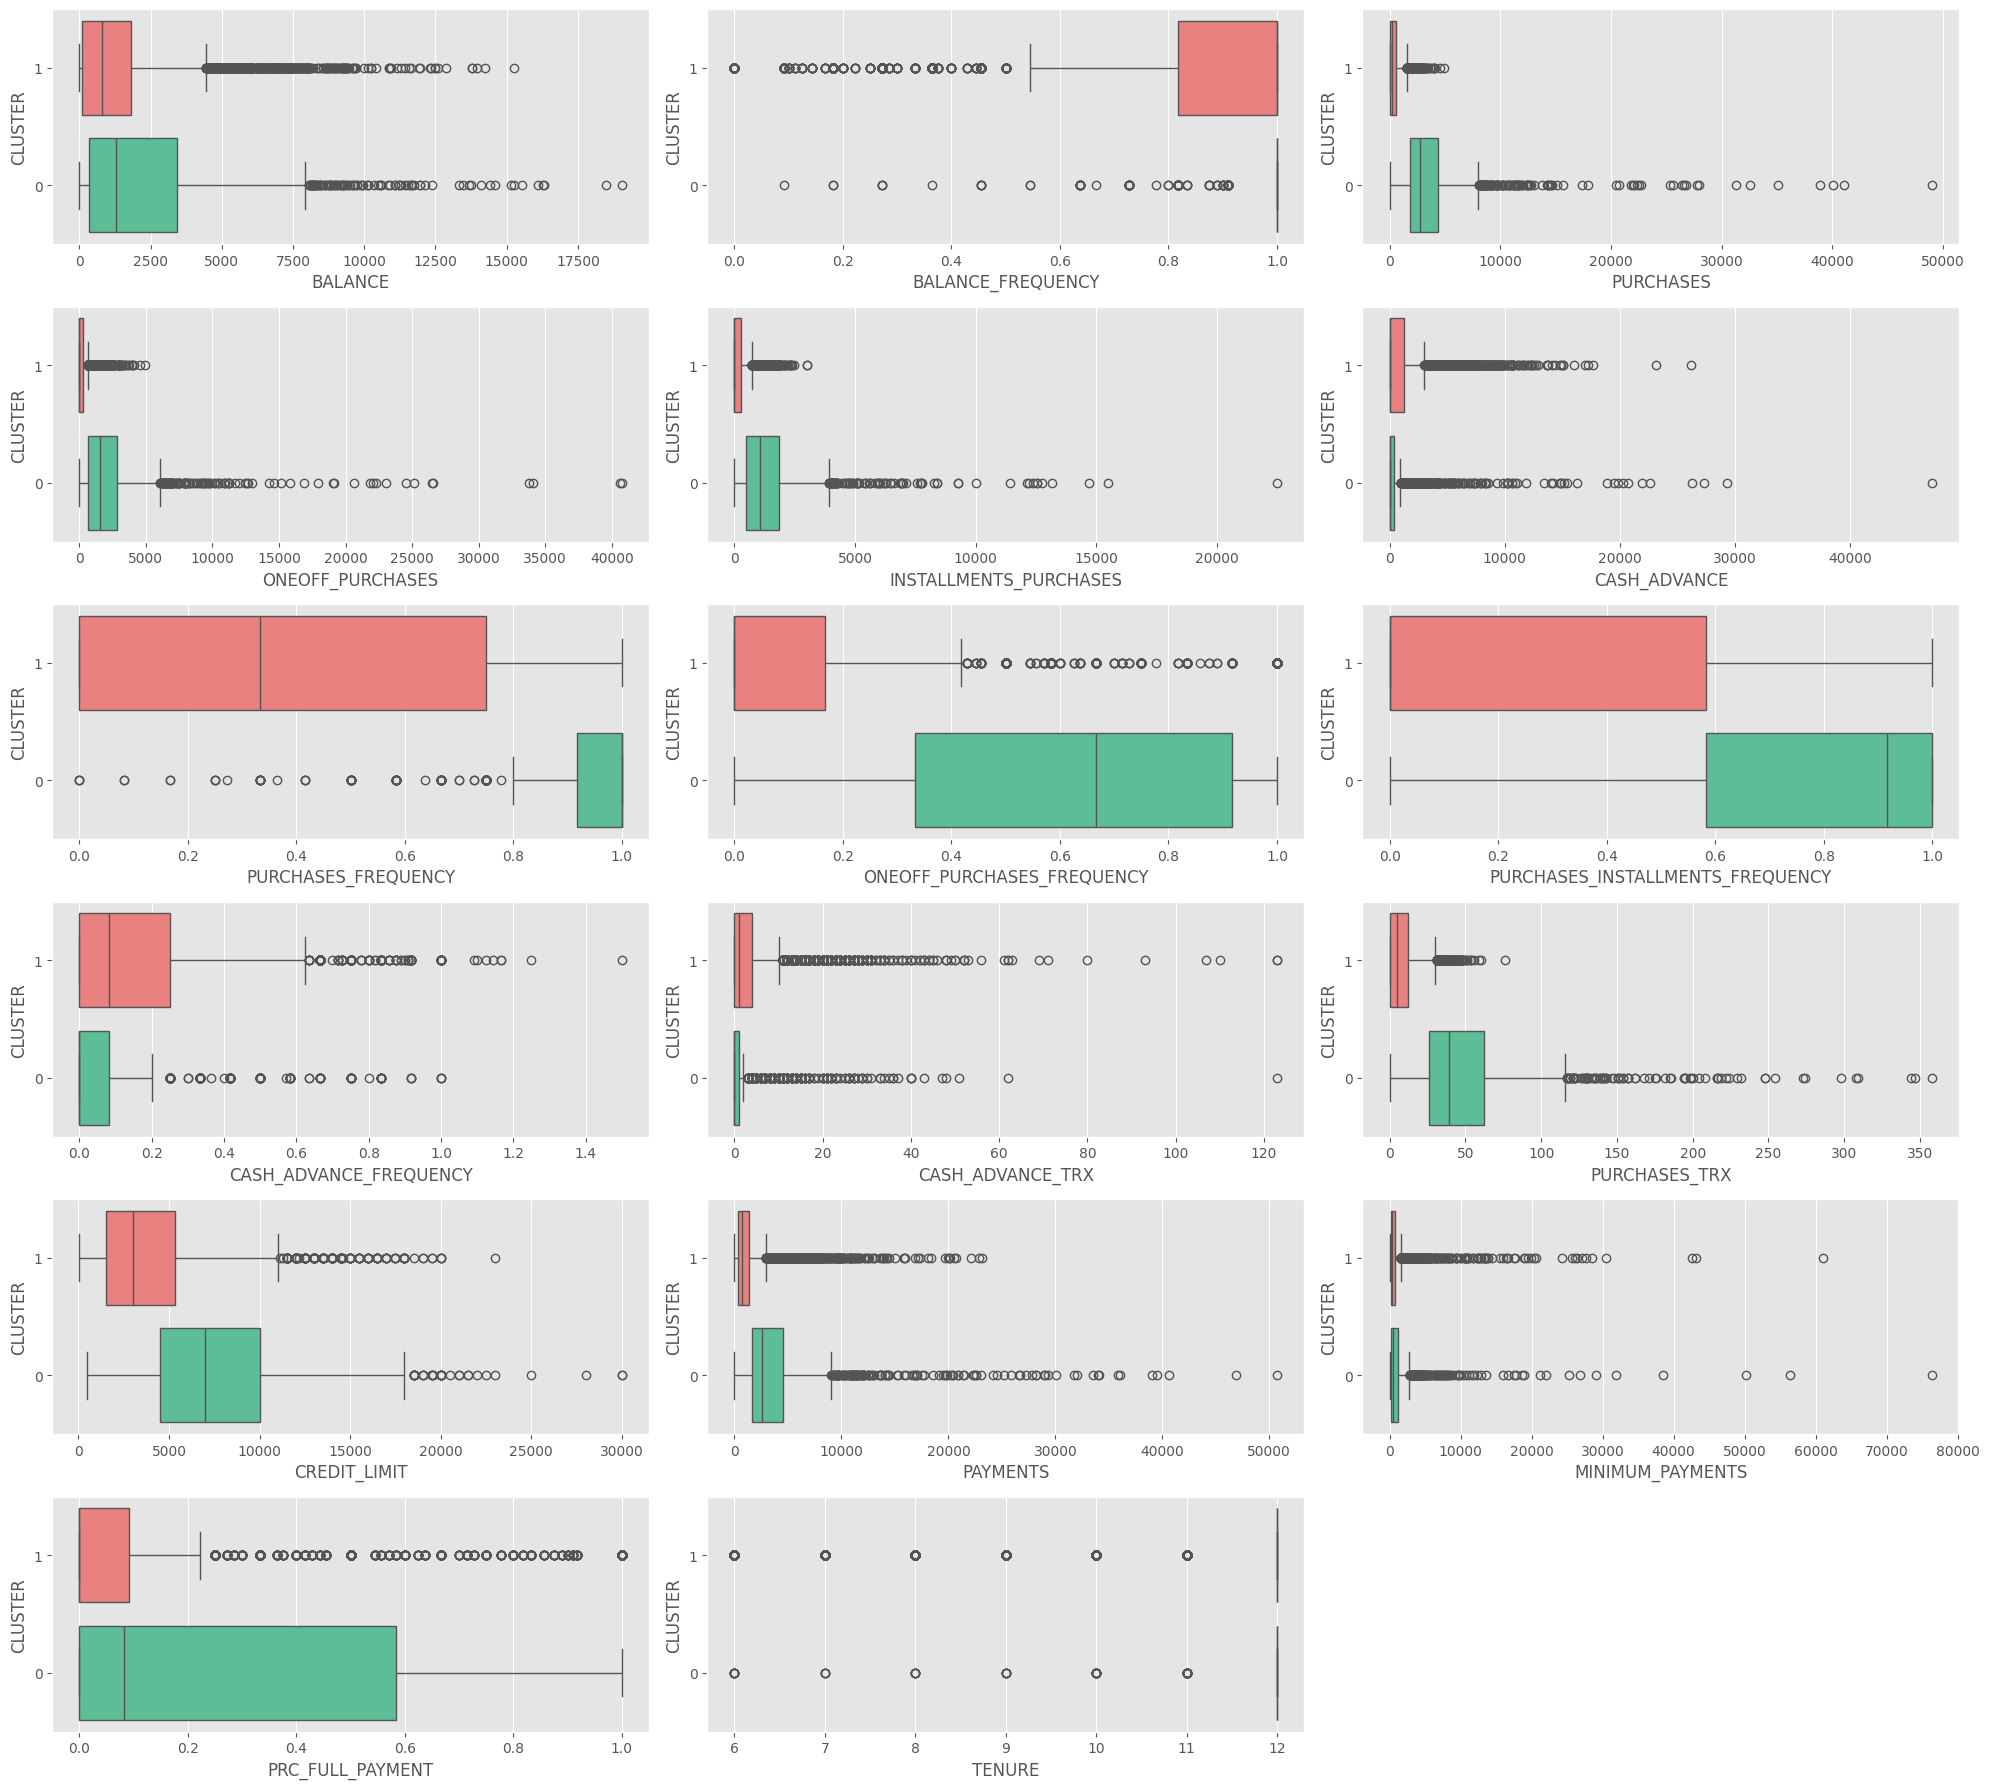

In [25]:
plt.figure(figsize=(20,18))

plot = 1
for col in data.columns[:-1]:
    plt.subplot(6,3,plot)
    sns.boxplot(data = data, x=col, y='CLUSTER', palette=['#FA7070', '#4CCD99'])
    plot = plot + 1

plt.tight_layout()

**Interpretation**

- Cluster 0 has a higher median for BALANCE, PURCHASES, ONE-OFF PURCHASES, PURCHASES TRANSACTION, CREDIT LIMIT, and PAYMENTS than Cluster 1.

In [26]:
pd.DataFrame({
    'Feature': X.columns[:-1],
    'Coef PC0' : pca_2com.components_[0],
    'Coef PC1' : pca_2com.components_[1],
}).sort_values('Coef PC0', ascending=False)

,Feature,Coef PC0,Coef PC1
2,PURCHASES,0.411595,0.040114
11,PURCHASES_TRX,0.390624,-0.020094
3,ONEOFF_PURCHASES,0.346361,0.061996
4,INSTALLMENTS_PURCHASES,0.336784,-0.019110
6,PURCHASES_FREQUENCY,0.321240,-0.191127
7,ONEOFF_PURCHASES_FREQUENCY,0.294499,-0.018508
8,PURCHASES_INSTALLMENTS_FREQUENCY,0.274499,-0.178846
13,PAYMENTS,0.266458,0.256763
12,CREDIT_LIMIT,0.211890,0.238062
15,PRC_FULL_PAYMENT,0.131841,-0.190054
